#### <center><font face="Times New ROman" size="10" color="#000080">- NA04 -</font></center>
<br>
<br><center><font face="Times New ROman" size="6" color="#000000">- Importando os Dados -</font>

In [1]:
%matplotlib inline
from pylab import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.mlab as mlab
from matplotlib.gridspec import GridSpec
#-----------------------------------------------------#
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#-----------------------------------------------------#
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#-----------------------------------------------------#
name = 'na-04'

In [3]:
#------------------------------------------------Armazenando os Dados----------------------------------------------------#

data  = np.fromfile('NA04.dat', dtype=float, count=-1, sep='	')

p  = len(data)/6 

print (len(data),'- comprimento original, antes da divisao')
print (p,'- comprimento de uma unica coluna')

data  = np.reshape(data, (len(data)/6,6))

#----------------------------------------As propriedades petrofisicas do poco--------------------------------------------#


prof = np.array(data[:,0],float) # profundidade em metros
DTP  = np.array(data[:,1],float) # DTp em us/ft
GR   = np.array(data[:,2],float) # GR em unidades API
ILD  = np.array(data[:,3],float) # ILD em Ohm.m
PHIN = np.array(data[:,4],float) # PHIN em %
RHOb = np.array(data[:,5],float) # RHOb em g/cm3

print ()
print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0])
print (prof[162], prof[876], prof[1007])

7878 - comprimento original, antes da divisao
1313.0 - comprimento de uma unica coluna


TypeError: 'float' object cannot be interpreted as an integer

In [3]:
#-------------------------------Litologia RJS0019-----------------------------------#
are = [0]*p
sil = [0]*p
mar = [0]*p
arg = [0]*p
mao = [0]*p


for i in range (p):
    if prof[i] >= 2966.2698 and prof[i] < 2976.1905:
        sil[i] = 70
    if prof[i] >= 2977.7778 and prof[i] < 2982.1429:
        sil[i] = 70
    if prof[i] >= 2984.5238 and prof[i] < 2991.6667:
        sil[i] = 70
    #----------------------------------------------#
    if prof[i] >= 2991.6667 and prof[i] < 3000.0000:
        are[i] = 90
    if prof[i] >= 3001.1905 and prof[i] < 3003.1746:
        are[i] = 90
    if prof[i] >= 3005.1587 and prof[i] < 3007.5397:
        are[i] = 90
    if prof[i] >= 3009.9206 and prof[i] < 3011.9048:
        are[i] = 90
    if prof[i] >= 3013.8889 and prof[i] < 3016.6667:
        are[i] = 90
    if prof[i] >= 3018.2540 and prof[i] < 3019.8413:
        are[i] = 90
    if prof[i] >= 3026.1905 and prof[i] < 3043.6508:
        are[i] = 90
    if prof[i] >= 3045.2381 and prof[i] < 3048.4127:
        are[i] = 90
    if prof[i] >= 3065.4762 and prof[i] < 3068.2540:
        are[i] = 90
    if prof[i] >= 3075.0000 and prof[i] < 3111.1111:
        are[i] = 90
    #----------------------------------------------#
    if prof[i] >= 2976.1905 and prof[i] < 2977.7778:
        mar[i] = 60
    if prof[i] >= 2982.1429 and prof[i] < 2984.5238:
        mar[i] = 60
    if prof[i] >= 3022.2222 and prof[i] < 3024.2064:
        mar[i] = 60
    if prof[i] >= 3050.0000 and prof[i] < 3052.3810:
        mar[i] = 60
    if prof[i] >= 3111.1111 and prof[i] < 3118.8413:
        mar[i] = 60
    #----------------------------------------------#
    if prof[i] >= 2951.0556 and prof[i] < 2963.8889:
        arg[i] = 50
    if prof[i] >= 3000.0000 and prof[i] < 3001.1905:
        arg[i] = 50
    if prof[i] >= 3003.1746 and prof[i] < 3005.1587:
        arg[i] = 50
    if prof[i] >= 3007.5397 and prof[i] < 3009.9206:
        arg[i] = 50
    if prof[i] >= 3011.9048 and prof[i] < 3013.8889:
        arg[i] = 50
    if prof[i] >= 3016.6667 and prof[i] < 3018.2540:
        arg[i] = 50
    if prof[i] >= 3019.8413 and prof[i] < 3022.2222:
        arg[i] = 50
    if prof[i] >= 3024.2064 and prof[i] < 3026.1905:
        arg[i] = 50
    if prof[i] >= 3043.6508 and prof[i] < 3045.2381:
        arg[i] = 50
    if prof[i] >= 3048.4127 and prof[i] < 3050.0000:
        arg[i] = 50
    if prof[i] >= 3052.3810 and prof[i] < 3065.4762:
        arg[i] = 50
    if prof[i] >= 3068.2540 and prof[i] < 3075.0000:
        arg[i] = 50
    #----------------------------------------------#
    if prof[i] >= 2963.8889 and prof[i] < 2966.2698:
        mao[i] = 60

#-----------------------------------------------------Granulometria------------------------------------------------------#
arem = [1e-6]*p #are - Areia media
silt = [1e-6]*p #sil - silte
shal = [1e-6]*p #arg - Argila

calu = [1e-6]*p # mar - Calcilutito
marl = [1e-6]*p # mao - Marga

for i in range(p):
    if are[i] == 90:
        arem[i] = 0.375
    if sil[i] == 70:
        silt[i] = 0.033
    if arg[i] == 50:
        shal[i] = 0.016
    if mar[i] == 60:
        calu[i] = 0.002
    if mao[i] == 60:
        marl[i] = 0.002

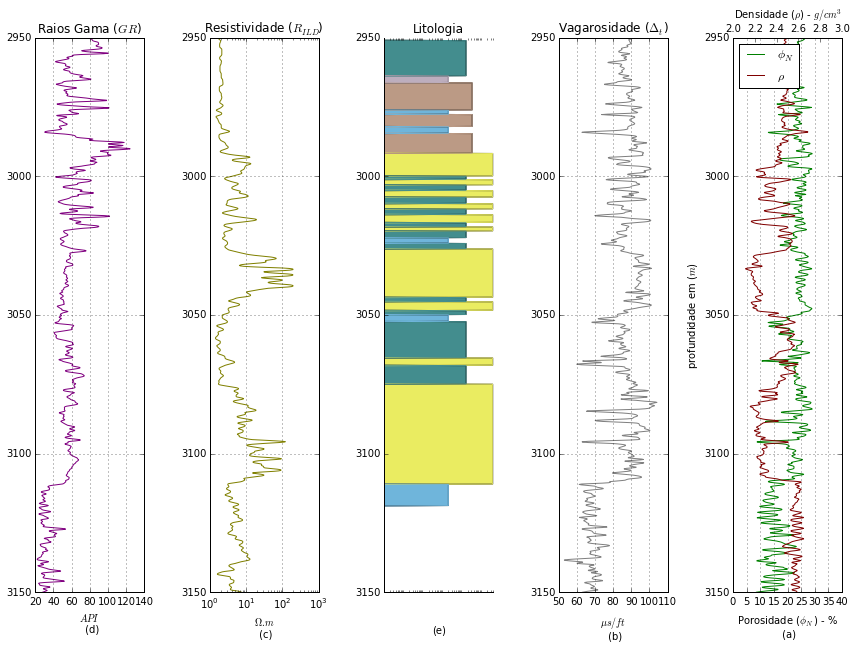

In [4]:
#--------------------------------------------------------Graficos--------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)

#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$')
ax1.set_title(u'Raios Gama ($GR$)')

ax1.set_xlabel('$API$ \n (d)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis()
ax1.grid()

#ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)')

ax2.set_xlabel('$\Omega.m$ \n (c)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.invert_yaxis()
ax2.grid()

#ax2.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61')
ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e')
ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')

ax3.fill_betweenx(prof, arem, facecolor='#eaec61')
ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e')
ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')

ax3.set_title('Litologia')                       
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.4,xmin=0)

ax3.invert_yaxis()

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
#ax3.spines['bottom'].set_visible(False)

ax3.yaxis.set_ticks_position('left')
ax3.axes.get_xaxis().set_ticks([])

ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$')


ax4.set_title('Vagarosidade ($\Delta _t$)')                      
ax4.set_xlabel('$\mu s / ft$ \n (b)')
ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.invert_yaxis()
ax4.grid()

#ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#

lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
#lab2 = ax1.plot(PHItd,prof,'-m',linewidth = 1,label='$\phi_{t,D}$')


ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (a)')                    
ax5.set_ylabel('profundidade em ($m$)')

ax0 = ax5.twiny()

lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')

labf = lab5+lab0#+lab2

labs = [l.get_label() for l in labf]
plt.legend(labf, labs, loc=2)

ax5.set_ylim(ymax=max(prof),ymin=min(prof))

ax0.set_xlim(xmax=3.0,xmin=2.0)
ax5.set_xlim(xmax=40.0,xmin=0.0)

ax5.invert_yaxis()
ax5.grid()
#--------------------------------------------------------------------------------------------------#


plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

#--------------------------------------------------------------------------------------------------#

<br><center><font face="Times New ROman" size="6" color="#000000">- Argilosidade -</font>

In [5]:
#-------------------------------Raio Gamma-----------------------------------#

IGR = []   #Indice de Raio Gama
VSH = []   #Argilosidade Larionov

for i in range (len(GR)):
    if GR[i] == min(GR): 
        locmin = i # determina a posicao do valor minimo do Gama Ray no perfil
    if GR[i] == max(GR):
        locmax = i # determina a posicao do valor maximo do Gama Ray no perfil
        
print locmin,'posicao do GR min |',min(GR),'valor do GR min'
print locmax,'posicao do GR min |',max(GR),'valor do GR max'

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print
print mean(IGR),' media (IGR) - indice de raio gama'
print mean(VSH),' media (VSH) - quantidade de folhelho '

1234 posicao do GR min | 22.10047 valor do GR min
263 posicao do GR min | 124.33641 valor do GR max

0.326017066345  media (IGR) - indice de raio gama
0.130218060788  media (VSH) - quantidade de folhelho 


<br><center><font face="Times New ROman" size="6" color="#000000">- Porosidades -</font>

In [6]:
#--------------------------------------------------Porosidade Total------------------------------------------------------#
RHOf  = 1.101 # g/cm3 para a agua salgada
DTPf = 189.0 # us/feet para agua salgada


RHOma = [2.65]*p
DTPma = [55.5]*p

for i in range (p):
    if mar[i] == 60:
        DTPma[i] = 66.6
        RHOma[i] = 2.68
    if mao[i] == 60:
        DTPma[i] = 66.6
        RHOma[i] = 2.68
    if arg[i] == 50:
        DTPma[i] = 85.0
        RHOma[i] = 2.56
    if sil[i] == 70:
        DTPma[i] = 70.3
        RHOma[i] = 2.60

RHOma  = [2.55]*p # g/cm3 para o quartzo
DTPma = [77.5]*p # us/feet para o quartzo

#print RHOma, 'RHOma da matriz  |',RHOf,'RHOf do filtrado de lama'
#print DTPma,'dtma da matriz |',DTPf,'DTPf do filtrado de lama'
#------------------------------------------------------------------------------------------------#
PHItd = [] # Porosidade total - perfil densidade

for i in range (p):
    PHItd.append(100*(RHOb[i] - RHOma[i])/(RHOf - RHOma[i]))       # Porosidade total - perfil densidade

print
print mean(PHItd),' media (PHItd) - porosidade total pelo perfil densidade em %'
#------------------------------------------------------------------------------------------------#
PHIsh = [] # Porosidade aparente - folhelho

for i in range (p):
    PHIsh.append(PHIN[i] - PHItd[i])
    
print
print mean(PHIsh),' media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %'
#------------------------------------------------------------------------------------------------#
for i in range (p):
    if PHIsh[i] == max(PHIsh):
        Psh = i
        
print Psh,' ponto de folhelho (Psh)'

RHOsh = RHOb[Psh]

print
print RHOsh, 'densidade do folhelho (RHOsh)'
print '------------------------------------'
#--------------------------------Porosidade Efetiva Densidade------------------------------------#
PHIe = []
for i in range (p):
    PHIe.append((((RHOb[i] - RHOma[i])/(RHOf - RHOma[i])) - ((VSH[i])*(RHOsh - RHOma[i])/(RHOf - RHOma[i])))*100)
    
print mean(PHIe),' media (PHIe) -  porosidade efetiva densidade'
#-----------------------------------------Porosidade Sonica--------------------------------------------------
PHIts = []
PHIes = []
gas   = []

DTPsh = DTP[Psh]
for i in range (p):
    
    PHIts.append(((DTP[i] - DTPma[i])/(DTPf - DTPma[i]))*100.0)    # Porosidade total - perfil sonico
    PHIes.append((((((DTP[i] - DTPma[i])/(DTPf - DTPma[i]))) - ((VSH[i])*(DTPsh - DTPma[i])/(DTPf - DTPma[i]))))*100.00)
    
print mean(PHIes),' media (PHIe) -  porosidade efetiva sonico'


8.71453590653  media (PHItd) - porosidade total pelo perfil densidade em %

12.7981087317  media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %
221  ponto de folhelho (Psh)

2.64682 densidade do folhelho (RHOsh)
------------------------------------
9.58463339759  media (PHIe) -  porosidade efetiva densidade
6.22915205996  media (PHIe) -  porosidade efetiva sonico


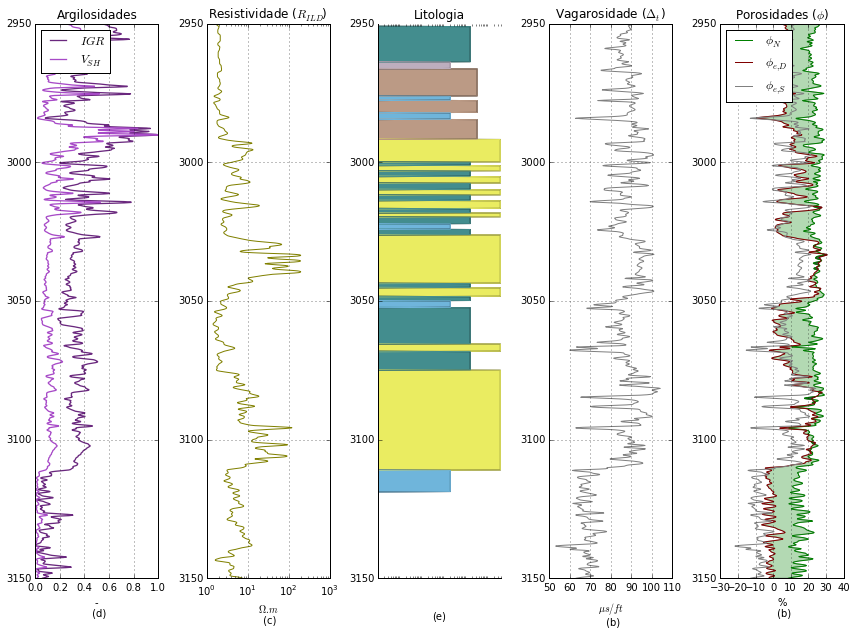

In [7]:
#--------------------------------------------------------Graficos--------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)

#--------------------------------------------------------------------------------------------------#
ax1.plot(IGR,prof,'-',linewidth = 1.3,color='#6A287E',label='$IGR$')
ax1.plot(VSH,prof,'-',linewidth = 1.3,color='#A74AC7',label='$V_{SH}$')
ax1.set_title(u'Argilosidades')

ax1.set_xlabel('- \n (d)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis()
ax1.grid()

ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)')

ax2.set_xlabel('$\Omega.m$ \n (c)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.invert_yaxis()
ax2.grid()

#ax2.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61')
ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e')
ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')

ax3.fill_betweenx(prof, arem, facecolor='#eaec61')
ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e')
ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')

ax3.set_title('Litologia')                       
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.4,xmin=0)

ax3.invert_yaxis()

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
#ax3.spines['bottom'].set_visible(False)

ax3.yaxis.set_ticks_position('left')
ax3.axes.get_xaxis().set_ticks([])

ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$')


ax4.set_title('Vagarosidade ($\Delta _t$)')                      
ax4.set_xlabel('$\mu s / ft$ \n (b)')
ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.invert_yaxis()
ax4.grid()

#ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIe  ,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e,D}$')
ax5.plot(PHIes ,prof,'-',linewidth = 1,color='Gray'  ,label='$\phi_{e,S}$')

ax5.set_title('Porosidades ($\phi$)')                      
ax5.set_xlabel('% \n (b)')
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis()
ax5.grid()

ax5.fill_betweenx(prof, PHIN, PHIe, where=PHIN>PHIe, facecolor='Green' , alpha=0.3)
ax5.fill_betweenx(prof, PHIN, PHIe, where=PHIe>PHIN, facecolor='Black' , alpha=0.7)

ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#


plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

#--------------------------------------------------------------------------------------------------#

<br><center><font face="Times New ROman" size="6" color="#000000">- Perfil Sônico Sintético (teste) -</font>

<br>$V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.43 − 4.05 \phi_{e,D} − 1.38 V_{sh} + 2.40 × 10^{−3} R_{ILD}$
<br>$V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.80 − 8.20 \phi_{e,D} − 4.31 V_{sh} + 12.72\phi_{e,D} V_{sh} + 10.42 \phi_{e,D}^2 + 2.57 V_{sh}^2$

0.80312885915 para o sonico e para VP 0.804627913589  - Siqueira - coeficiente de correlacao 349.115378036
0.821486551078 para o sonico e para VP 0.829472012986  - Augusto - coeficiente de correlacao 315.576032859
0.771803705076 para o sonico e para VP2 0.784555428235  - Augusto - coeficiente de correlacao

para VP no NA-02 0.755374723235  - Augusto 02 - coeficiente de correlacao
para VP no NA-07 0.820608513586  - Augusto 07 - coeficiente de correlacao
para VP no NA-12 0.822010105156  - Augusto 12 - coeficiente de correlacao
para VP no NA-37 0.510004558295  - Augusto 37 - coeficiente de correlacao


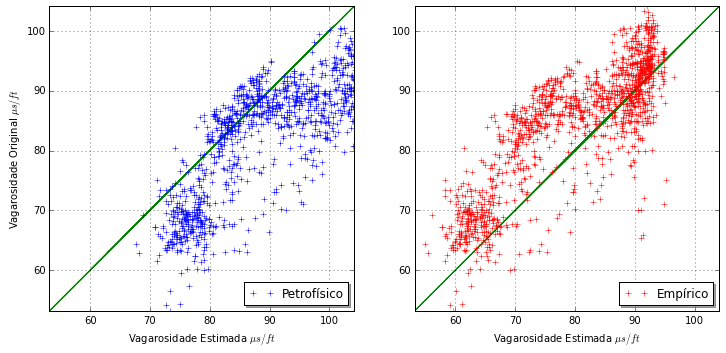

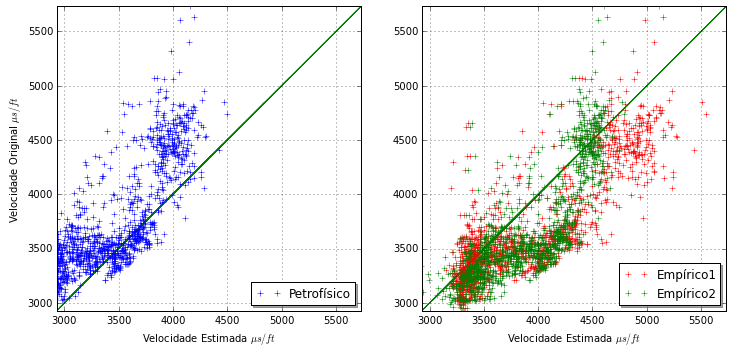

In [8]:
#-------------------------------------------------------Estimando VP-----------------------------------------------------#
cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))
#---------------------------------------------------------------
siq = "- Siqueira"; aug = "- Augusto"

siqp = name+siq
augp = name+aug

PHIs = max(PHIsh) #Usar essa porosidade aqui para estimar
#----------------------------------------------------Modelo Petrofisico--------------------------------------------------#

DTPs = []

for i in range (p):
    DTPs.append(DTPma[i] + (DTPf - DTPma[i])*((PHIe[i]/100.0) + (VSH[i]*(PHIs/100.0)))) # Sonico (Siqueira & Martins)

VPs=[] # velocidade de onda P (Siqueira e Martins)
for i in range(p):
    VPs.append(1.0000/(cfvp*DTPs[i]))
    
#---------------------------------------#

corrS1 = np.corrcoef(DTP,DTPs)
corrS2 = np.corrcoef(VP,VPs)

medS1 = []
for i in range(p):
    medS1.append(np.sqrt((VP[i]-VPs[i])**2))
    
medS1_f = np.mean(medS1)

print corrS1[0,1],'para o sonico e para VP',corrS2[0,1]," - Siqueira - coeficiente de correlacao",medS1_f

#------------------------------------------------------Modelo Empirico---------------------------------------------------#

VPa  = [] # Vp de augusto
VPa2 = [] # Vp de augusto 2

VPa_02 = []
VPa_07 = []
VPa_12 = []
VPa_37 = []

cfvp0 = 3.2808*(10**(-6)) # fator de conversao 

for i in range (p): # determinando VPa em ms
    VPa.append(4.80 - (8.20*PHIe[i]/100.0) - (4.31*VSH[i]) + (12.72*(PHIe[i]/100.0)*VSH[i]) 
    + (10.42*((PHIe[i]/100)**2)) + (2.57*VSH[i]**2))
    
    VPa2.append(4.43 -(4.05*PHIe[i]/100.0) - (1.38*VSH[i]) + (2.40*(ILD[i])*10**(-3)))
    
    VPa_02.append(4.29 - (2.66*PHIe[i]/100.0) - (1.78*VSH[i]) - (5.38*ILD[i]*(10**(-5))))
    
    VPa_07.append(4.84 - (8.43*PHIe[i]/100.0) - (5.52*VSH[i]) + (18.78*(PHIe[i]/100.0)*VSH[i]) 
    + (8.94*((PHIe[i]/100)**2)) + (2.25*VSH[i]**2))
    
    VPa_12.append(4.28 - (5.63*PHIe[i]/100.0) - (2.74*VSH[i]) + (9.24*(PHIe[i]/100.0)*VSH[i]) 
    + 6.76*(PHIe[i]/100.0)**2 + (0.85*(VSH[i])**2))
    
    VPa_37.append(3.90 - (5.07*PHIe[i]/100.0) + (0.39*VSH[i]) + (ILD[i]*1.88*(10**(-2))))
    
DTPa  = []
DTPa2 = []
for i in range(p):
    VPa[i]  = VPa[i]*1000.000
    VPa2[i] = VPa2[i]*1000.000
    DTPa.append(1.0000/(cfvp0*VPa[i]))
    DTPa2.append(1.0000/(cfvp0*VPa2[i]))

#--------------------------------------#

medA1 = []
for i in range(p):
    medA1.append(np.sqrt((VP[i]-VPa[i])**2))
    
medA1_f = np.mean(medA1)

corrA1 = np.corrcoef(DTP,DTPa)
corrA2 = np.corrcoef(VP,VPa)
corrA3 = np.corrcoef(DTP,DTPa2)
corrA4 = np.corrcoef(VP,VPa2)

corr_na02 = np.corrcoef(VP,VPa_02)
corr_na07 = np.corrcoef(VP,VPa_07)
corr_na12 = np.corrcoef(VP,VPa_12)
corr_na37 = np.corrcoef(VP,VPa_37)

print corrA1[0,1],'para o sonico e para VP',corrA2[0,1]," - Augusto - coeficiente de correlacao",medA1_f
print corrA3[0,1],'para o sonico e para VP2',corrA4[0,1]," - Augusto - coeficiente de correlacao"
print
print 'para VP no NA-02',corr_na02[0,1]," - Augusto 02 - coeficiente de correlacao"
print 'para VP no NA-07',corr_na07[0,1]," - Augusto 07 - coeficiente de correlacao"
print 'para VP no NA-12',corr_na12[0,1]," - Augusto 12 - coeficiente de correlacao"
print 'para VP no NA-37',corr_na37[0,1]," - Augusto 37 - coeficiente de correlacao"

#--------------------------------------------------diferenca velocidades-------------------------------------------------#

difVPVPa = [] # Diferenca absoluta VP - VPa
difVPVPs = [] # Diferenca absoluta VP - VPs

relVPVPa = [] # Diferenca relativa VP - VPa
relVPVPs = [] # Diferenca relativa VP - VPs

for i in range (p):
    difVPVPa.append(np.sqrt((VPa[i] - VP[i])**2))
    difVPVPs.append(np.sqrt((VPs[i] - VP[i])**2))
    
    relVPVPa.append(100.0*np.sqrt((((VP[i] - VPa[i])/VP[i]))**2))
    relVPVPs.append(100.0*np.sqrt((((VP[i] - VPs[i])/VP[i]))**2))
    
#------------------------------------------------------------------------------------------------------------------------#
fig = plt.figure(figsize= (12,12))

ax1 = plt.subplot(221)
ax1.plot(DTP,DTP,'-g')
ax1.plot(DTPs,DTP,'+b',label=u'Petrofísico')
legend = ax1.legend(loc=4, shadow=True)
plt.xlim(xmax=max(DTP),xmin=min(DTP))
plt.ylim(ymax=max(DTP),ymin=min(DTP))
plt.xlabel('Vagarosidade Estimada $\mu s / ft$')
plt.ylabel('Vagarosidade Original $\mu s / ft$')
plt.grid()

#------------------------------------------------#

ax2 = plt.subplot(222)
ax2.plot(DTP,DTP,'-g')
ax2.plot(DTPa,DTP,'+r',label=u'Empírico')
legend = ax2.legend(loc=4, shadow=True)

plt.xlabel('Vagarosidade Estimada $\mu s / ft$')
plt.xlim(xmax=max(DTP),xmin=min(DTP))
plt.ylim(ymax=max(DTP),ymin=min(DTP))
plt.grid()

plt.show()
#------------------------------------------------------------------------------------------------------------------------#
    
fig = plt.figure(figsize= (12,12))

ax1 = plt.subplot(221)
ax1.plot(VP,VP,'-g')
ax1.plot(VPs,VP,'+b',label=u'Petrofísico')
legend = ax1.legend(loc=4, shadow=True)
plt.xlim(xmax=max(VP),xmin=min(VP))
plt.ylim(ymax=max(VP),ymin=min(VP))
plt.xlabel('Velocidade Estimada $\mu s / ft$')
plt.ylabel('Velocidade Original $\mu s / ft$')
plt.grid()

#------------------------------------------------#

ax2 = plt.subplot(222)
ax2.plot(VP,VP,'-g')
ax2.plot(VPa, VP,'+r',label=u'Empírico1')
ax2.plot(VPa2,VP,'+g',label=u'Empírico2')
legend = ax2.legend(loc=4, shadow=True)

plt.xlabel('Velocidade Estimada $\mu s / ft$')
plt.xlim(xmax=max(VP),xmin=min(VP))
plt.ylim(ymax=max(VP),ymin=min(VP))
plt.grid()

plt.show()
name2 = '../../mario_tese/Figs/pocos/na'+name+'scatterplot.png'

fig.savefig(name2, dpi=100, transparent=True, bbox_inches='tight')

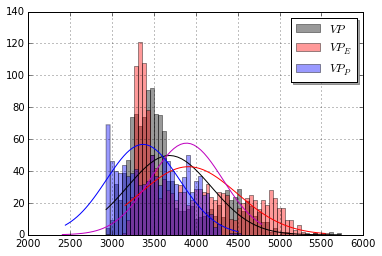

In [9]:
bins_s  = 60
bins_vp = np.linspace(min(VP), max(VP), bins_s)
#----------------------------------------------------------------------------#

plt.figure(1)
# VP
plt.hist(VP , bins_vp, histtype='bar', stacked=True, color='k', alpha=0.4,label='$VP$')
result_0 = np.histogram(VP ,bins=bins_vp)
dx_0 = result_0[1][1] - result_0[1][0]

plt.plot(np.linspace(min(VP), max(VP),bins_s), mlab.normpdf(np.linspace(min(VP),max(VP),bins_s),np.mean(VP),
                                                             np.sqrt(np.var(VP)))*len(VP)*dx_0, color='k')
#----------------------------------------------------------------------------#
#VP
plt.hist(VPa, bins_vp, histtype='bar', stacked=True, color='r', alpha=0.4,label='$VP_E$')
result_1 = np.histogram(VPa ,bins=bins_vp)
dx_1 = result_1[1][1] - result_1[1][0]

plt.plot(np.linspace(min(VPa), max(VPa),bins_s), mlab.normpdf(np.linspace(min(VPa),max(VPa),bins_s),np.mean(VPa),
                                                               np.sqrt(np.var(VPa)))*len(VPa)*dx_1, color='r')

plt.plot(np.linspace(min(VPa2), max(VPa2),bins_s), mlab.normpdf(np.linspace(min(VPa2),max(VPa2),bins_s),np.mean(VPa2),
                                                               np.sqrt(np.var(VPa2)))*len(VPa2)*dx_1, color='m')
#----------------------------------------------------------------------------#
# VP

plt.hist(VPs, bins_vp, histtype='bar', stacked=True, color='b', alpha=0.4,label='$VP_P$')
result_2 = np.histogram(VPs ,bins=bins_vp)
dx_2 = result_2[1][1] - result_2[1][0]

plt.plot(np.linspace(min(VPs), max(VPs),bins_s), mlab.normpdf(np.linspace(min(VPs),max(VPs),bins_s),np.mean(VPs),
                                                               np.sqrt(np.var(VPs)))*len(VPs)*dx_2, color='b')
#----------------------------------------------------------------------------#
legend = plt.legend(loc=1, shadow=True)
plt.grid()
plt.show()

In [10]:
range_teste = 10
DTPmaR = np.linspace(55.000,90.000,range_teste)
RHOmaR = np.linspace(1.0,2.700,range_teste)

VPs2 = []
dif2 = []
VPo  = []

DTPma_values = []
RHOma_values = []

for k in range (len(DTPmaR)):
    for j in range (len(RHOmaR)):
        for i in range (len(VP)):
            
            VPs2.append(1.0000/(cfvp*(DTPmaR[k] + (DTPf - DTPmaR[k])*(((((RHOb[i] - RHOmaR[j])/(RHOf - RHOmaR[j])) 
            - ((VSH[i])*(RHOsh - RHOmaR[j])/(RHOf - RHOmaR[j])))) + (VSH[i]*(PHIs/100.0))))))
            
            dif2.append(np.sqrt(((1.0000/(cfvp*(DTPmaR[k] + (DTPf - DTPmaR[k])*(((((RHOb[i] - RHOmaR[j])/(RHOf 
            - RHOmaR[j])) - ((VSH[i])*(RHOsh - RHOmaR[j])/(RHOf - RHOmaR[j])))) + (VSH[i]*(PHIs/100.0)))))) - VP[i])**2))
            DTPma_values.append(DTPmaR[k])
            RHOma_values.append(RHOmaR[j])
            
            VPo.append(VP[i])

print len(dif2)

dif3 = np.reshape(dif2,(range_teste**2,p))
VPs3 = np.reshape(VPs2,(range_teste**2,p))
VPo2 = np.reshape(VPo, (range_teste**2,p))

RHOma_final_A = np.reshape(RHOma_values,(range_teste**2,p))
DTPma_final_A = np.reshape(DTPma_values,(range_teste**2,p))

middif = []
corval = []

for i in range (range_teste**2):
    middif.append(np.mean(dif3[i,:]))
    corval.append(np.corrcoef(VPs3[i,:],VPo2[i,:])[0,1])

print
#print middif
print np.min(middif),'media diferenca'
print
#print corval
print np.max(corval),'coeficiente de correlacao'
print

for i in range (len(middif)):
    if middif[i] == min(middif):
        point_blue  = i
    if corval[i] == max(corval):
        point_black = i
        
print RHOma_final_A[point_blue,:][0],'RHOma minima media erro'
print DTPma_final_A[point_blue,:][0],'DTPma minima media erro'
print
print RHOma_final_A[point_black,:][0],'RHOma maximo coeficiente de correlacao'
print DTPma_final_A[point_black,:][0],'DTPma maximo coeficiente de correlacao'

131300

262.108603112 media diferenca

0.835824162896 coeficiente de correlacao

2.7 RHOma minima media erro
58.8888888889 DTPma minima media erro

2.13333333333 RHOma maximo coeficiente de correlacao
78.3333333333 DTPma maximo coeficiente de correlacao


para o sonico e para VP 0.835902218013  - Siqueira - coeficiente de correlacao


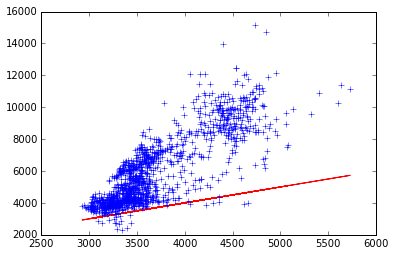

In [11]:
VPs4=[] # velocidade de onda P (Siqueira e Martins)

VVVV = 78.3
RRRR = 2.13

for i in range(p):
    VPs4.append(1.0000/(cfvp*(VVVV + (DTPf - VVVV)*(((((RHOb[i] - RRRR)/(RHOf - RRRR)) 
            - ((VSH[i])*(RHOsh - RRRR)/(RHOf - RRRR)))) + (VSH[i]*(PHIs/100.0))))))
    
#---------------------------------------#

corrS20 = np.corrcoef(VP,VPs4)

print 'para o sonico e para VP',corrS20[0,1]," - Siqueira - coeficiente de correlacao"  

#------------------------------------------------------Modelo Empirico---------------------------------------------------#
plt.plot(VP,VP,'-r')
plt.plot(VP,VPs4,'+b')
plt.show()

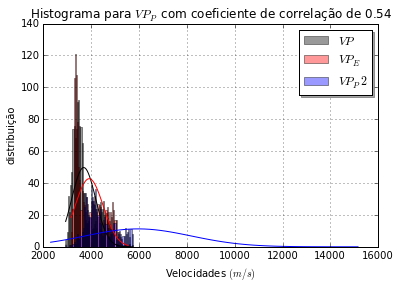

In [12]:
bins_s  = 60
bins_vp = np.linspace(min(VP), max(VP), bins_s)
#----------------------------------------------------------------------------#

plt.figure(1)
# VP
plt.hist(VP , bins_vp, histtype='bar', stacked=True, color='k', alpha=0.4,label='$VP$')
result_0 = np.histogram(VP ,bins=bins_vp)
dx_0 = result_0[1][1] - result_0[1][0]

plt.plot(np.linspace(min(VP), max(VP),bins_s), mlab.normpdf(np.linspace(min(VP),max(VP),bins_s),np.mean(VP),
                                                             np.sqrt(np.var(VP)))*len(VP)*dx_0, color='k')
#----------------------------------------------------------------------------#
#VP
plt.hist(VPa, bins_vp, histtype='bar', stacked=True, color='r', alpha=0.4,label='$VP_E$')
result_1 = np.histogram(VPa ,bins=bins_vp)
dx_1 = result_1[1][1] - result_1[1][0]

plt.plot(np.linspace(min(VPa), max(VPa),bins_s), mlab.normpdf(np.linspace(min(VPa),max(VPa),bins_s),np.mean(VPa),
                                                               np.sqrt(np.var(VPa)))*len(VPa)*dx_1, color='r')
#----------------------------------------------------------------------------#
# VP

plt.hist(VPs4, bins_vp, histtype='bar', stacked=True, color='b', alpha=0.4,label='$VP_P2$')
result_2 = np.histogram(VPs4 ,bins=bins_vp)
dx_2 = result_2[1][1] - result_2[1][0]

plt.plot(np.linspace(min(VPs4), max(VPs4),bins_s), mlab.normpdf(np.linspace(min(VPs4),max(VPs4),bins_s),np.mean(VPs4),
                                                               np.sqrt(np.var(VPs4)))*len(VPs4)*dx_2, color='b')
#----------------------------------------------------------------------------#
plt.title(u'Histograma para $VP_P$ com coeficiente de correlação de 0.54')
plt.xlabel('Velocidades $(m / s)$')
plt.ylabel(u'distribuição')
legend = plt.legend(loc=1, shadow=True)
plt.grid()
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Impedância Acústica -</font>

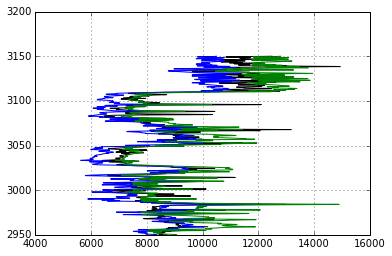

In [13]:
#--------------------------------------Impedancia---(transformado de pe pra m)-------------------------------------------#
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)

#------------------------------------------------------Impedancia Acustica-----------------------------------------------#


z_imp = [] # Impedancia acustica (m/s).(g/cm3)
Z     = [] # Impedancia acustica (Km/s).(g/cm3)

z_imp_a = [] # Impedancia acustica Augusto  (m/s).(g/cm3)
z_imp_s = [] # Impedancia acustica Siqueira (m/s).(g/cm3)

Za = [] # Impedancia acustica Augusto (Km/s).(g/cm3)
Zs = [] # Impedancia acustica Siqueira(Km/s).(g/cm3)

for i in range (p):
    z_imp0 = (RHOsi[i]*VP[i]) # de olho no RHOsi e RHOb
    z_imp.append(z_imp0)
    Z.append(z_imp0*1000.000)
    
    z_imp0a = (RHOsi[i]*VPa[i]) # de olho no RHOsi e RHOb
    z_imp_a.append(z_imp0a)
    Za.append(z_imp0a*1000.000)
    
    z_imp0s = (RHOsi[i]*VPs[i]) # de olho no RHOsi e RHOb
    z_imp_s.append(z_imp0s)
    Zs.append(z_imp0s*1000.000)
    
#------------------------------------------------------------------------------------------------------------------------#
plt.plot(Z ,prof,'-k',linewidth = 1)
plt.plot(Zs,prof,'-b',linewidth = 1)
plt.plot(Za,prof,'-g',linewidth = 1)
plt.grid()
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Refletividade -</font>

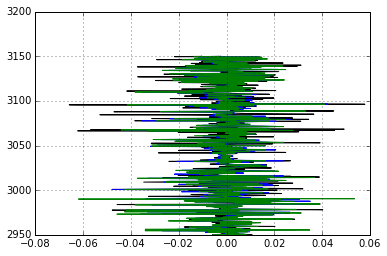

In [14]:
#--------------------------------Refletividades---------------------

R  = [] # Refletividade
Rs = [] # Refletividade Siqueira
Ra = [] # Refletividade Augusto

for i in range (p):
    if i == 0:
        RR = 0
        RRs= 0
        RRa= 0
    if i != 0:
        RR = (z_imp[i-1] - z_imp[i])/(z_imp[i-1] + z_imp[i])
        RRs= (z_imp_s[i-1] - z_imp_s[i])/(z_imp_s[i-1] + z_imp_s[i])
        RRa= (z_imp_a[i-1] - z_imp_a[i])/(z_imp_a[i-1] + z_imp_a[i])
    R.append(RR)
    Rs.append(RRs)
    Ra.append(RRa)
    
zero_bar = [0]*p

#------------------------------------------------------------------------------------------------------------------------#
plt.plot(R ,prof,'-k',linewidth = 1)
plt.plot(Rs,prof,'-b',linewidth = 1)
plt.plot(Ra,prof,'-g',linewidth = 1)
plt.grid()
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Tempo -</font>

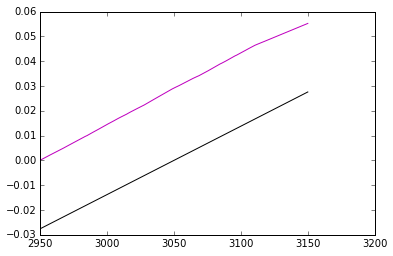

In [15]:
#---------------------------------------------time c(t)-----------------------------#
DL = prof[3]-prof[2]# valor do intervalo em m

T  = [] #tempo por intervalo padrao
Ts = [] #tempo por intervalo Siqueira
Ta = [] #tempo por intervalo Augusto 

for i in range (p):
    T.append(DL/VP[i])
    Ts.append(DL/VPs[i])
    Ta.append(DL/VPa[i])
    
#---------------------------------------------time c(t)-----------------------------#

# de 1313 elementos, o elemento 657 e central. No pyton, esse elemento e o 656

mp  = (p-1)/2 # termo central

dtf = [0.0]*mp
dtb = [0.0]*mp

dtfs = [0.0]*mp
dtbs = [0.0]*mp

dtfa = [0.0]*mp
dtba = [0.0]*mp

#----------------------------------------------------#

for i in range (mp):
    dtf[i] = np.mean(T)
    dtb[i] = -(np.mean(T))
    
    dtfs[i] = np.mean(Ts)
    dtbs[i] = -(np.mean(Ts))
    
    dtfa[i] = np.mean(Ta)
    dtba[i] = -(np.mean(Ta))
    
for i in range (1,mp):
    dtf[i]  = dtf[i- 1] + dtf[i]
    dtfs[i] = dtfs[i-1] + dtfs[i]
    dtfa[i] = dtfa[i-1] + dtfa[i]
    
for i in range (1,mp):
    dtb[i]  = dtb[i -1] + dtb[i]
    dtbs[i] = dtbs[i-1] + dtbs[i]
    dtba[i] = dtba[i-1] + dtba[i]
    
dtb.reverse()
dtbs.reverse()
dtba.reverse()

TT  = [0.0]*p
TTs = [0.0]*p
TTa = [0.0]*p

for i in range (len(dtb)):
    TT[i]  = dtb[i]
    TTs[i] = dtbs[i]
    TTa[i] = dtba[i]
    
for i in range (mp+1,p):
    TT[i]  = dtf[i-mp-1]
    TTs[i] = dtfs[i-mp-1]
    TTa[i] = dtfa[i-mp-1]
    
TTT = np.cumsum(T)

plt.plot(prof,TT,'-k')
#plt.plot(prof,TTs,'-b')
#plt.plot(prof,TTa,'-g')
plt.plot(prof,TTT,'-m')
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Wavlet e Convolução -</font>

-1.28455740097e-06


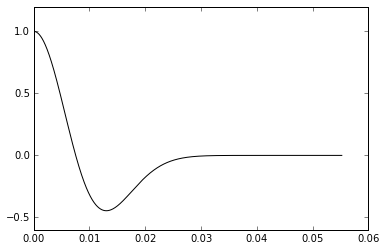

0.0333333333333


In [16]:
A = 1.000000
f = 30
ff = str(f) + " - Hz"

wavK = []
for i in range (len(TTT)):
    EEK = -(np.pi**2)*(f**2)*((TTT[0] - TTT[i])**2)
    wav0K = A*(1 - (2*(np.pi**2)) * (f**2) * ((TTT[0] - TTT[i])**2))*np.exp(EEK) # 2497.55919007
    wavK.append(wav0K)
    
FXG0 = []   
for i in range (len(TTT)):
    FXG0.append(R[i]*wavK[i]*T[i])
    
FXG1 = np.sum(FXG0)
print FXG1
    
plt.plot(TTT,wavK ,'-k')
plt.show()

print 1/30.0000

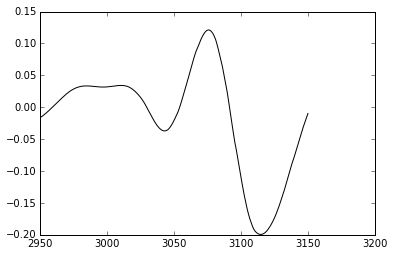

In [17]:

A = 1.000000
f = 30
ff = str(f) + " - Hz"

FXG = []
for j in range (p):
    wavK = []
    for i in range (len(TTT)):
        EEK = -(np.pi**2)*(f**2)*((TTT[j] - TTT[i])**2)
        wav0K = A*(1 - (2*(np.pi**2)) * (f**2) * ((TTT[j] - TTT[i])**2))*np.exp(EEK) # 2497.55919007
        wavK.append(wav0K)
        
    FXG0 = []   
    for i in range (len(TTT)):
        FXG0.append(R[i]*wavK[i])#*T[i]
    
    FXG1 = np.sum(FXG0)
    FXG.append(FXG1)
    
plt.plot(prof,FXG ,'-k')
plt.show()

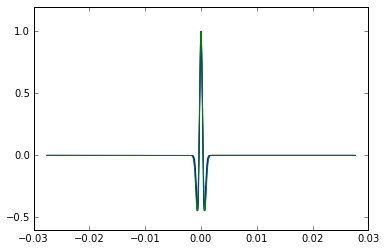

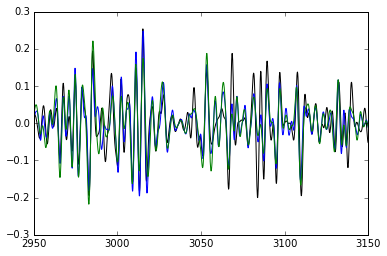

In [18]:
#wavlet

A = 1.000000
f = 600 
ff = str(f) + " - Hz"

wav = []
for i in range (len(TT)):
    EE1 = -(np.pi**2)*(f**2)*(TT[i]**2)
    wav01 = A*(1 - (2*(np.pi**2)) * (f**2) * (TT[i]**2))*np.exp(EE1) # 2497.55919007
    wav.append(wav01)
    
wavs = []
for i in range (len(TT)):
    EE1s = -(np.pi**2)*(f**2)*(TTs[i]**2)
    wav01s = A*(1 - (2*(np.pi**2)) * (f**2) * (TTs[i]**2))*np.exp(EE1s) # 2497.55919007
    wavs.append(wav01s)
    
wava = []
for i in range (len(TT)):
    EE1a = -(np.pi**2)*(f**2)*(TTa[i]**2)
    wav01a = A*(1 - (2*(np.pi**2)) * (f**2) * (TTa[i]**2))*np.exp(EE1a) # 2497.55919007
    wava.append(wav01a)
    
    
plt.plot(TT,wav ,'-k')
plt.plot(TT,wavs,'-b')
plt.plot(TT,wava,'-g')
plt.show()

# Convolucao

signal  = np.convolve(R ,wav,'same')  # wavlet convolucao Padrao
signals = np.convolve(Rs,wavs,'same') # wavlet convolucao Siqueira
signala = np.convolve(Ra,wava,'same') # wavlet convolucao Augusto

plt.plot(prof,signal,'-k')
plt.plot(prof,signals,'-b')
plt.plot(prof,signala,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

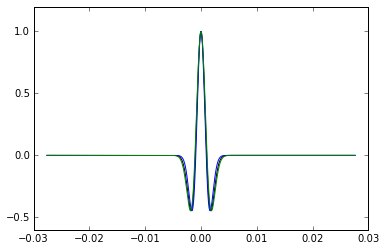

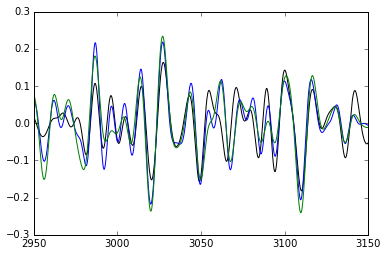

In [19]:
#wavlet

A1 = 1.000000
f1 = 220
ff1 = str(f1) + " - Hz"

wav1 = []
for i in range (len(TT)):
    EE2 = -(np.pi**2)*(f1**2)*(TT[i]**2)
    wav02 = A1*(1 - (2*(np.pi**2)) * (f1**2) * (TT[i]**2))*np.exp(EE2) # 2497.55919007
    wav1.append(wav02)
    
wav1s = []
for i in range (len(TT)):
    EE2s = -(np.pi**2)*(f1**2)*(TTs[i]**2)
    wav02s = A1*(1 - (2*(np.pi**2)) * (f1**2) * (TTs[i]**2))*np.exp(EE2s) # 2497.55919007
    wav1s.append(wav02s)
    
wav1a = []
for i in range (len(TT)):
    EE2a = -(np.pi**2)*(f1**2)*(TTa[i]**2)
    wav02a = A1*(1 - (2*(np.pi**2)) * (f1**2) * (TTa[i]**2))*np.exp(EE2a) # 2497.55919007
    wav1a.append(wav02a)
    
    
plt.plot(TT,wav1,'-k')
plt.plot(TT,wav1s,'-b')
plt.plot(TT,wav1a,'-g')
plt.show()

# Convolucao

signal1  = np.convolve(R,wav1,'same')  # wavlet convolucao Padrao
signal1s = np.convolve(Rs,wav1s,'same') # wavlet convolucao Siqueira
signal1a = np.convolve(Ra,wav1a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal1,'-k')
plt.plot(prof,signal1s,'-b')
plt.plot(prof,signal1a,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

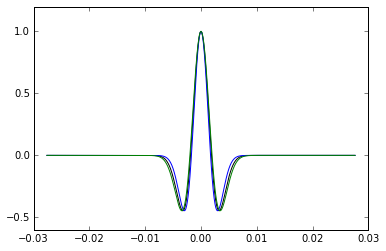

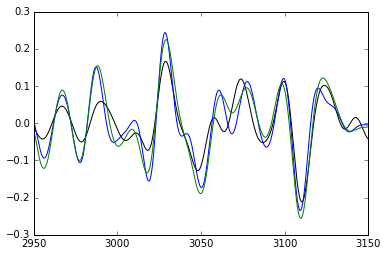

In [20]:
#wavlet

A2 = 1.000000
f2 = 120
ff2 = str(f2) + " - Hz"

wav2 = []
for i in range (len(TT)):
    EE3 = -(np.pi**2)*(f2**2)*(TT[i]**2)
    wav03 = A2*(1 - (2*(np.pi**2)) * (f2**2) * (TT[i]**2))*np.exp(EE3) # 2497.55919007
    wav2.append(wav03)
    
wav2s = []
for i in range (len(TT)):
    EE3s = -(np.pi**2)*(f2**2)*(TTs[i]**2)
    wav03s = A2*(1 - (2*(np.pi**2)) * (f2**2) * (TTs[i]**2))*np.exp(EE3s) # 2497.55919007
    wav2s.append(wav03s)
    
wav2a = []
for i in range (len(TT)):
    EE3a = -(np.pi**2)*(f2**2)*(TTa[i]**2)
    wav03a = A2*(1 - (2*(np.pi**2)) * (f2**2) * (TTa[i]**2))*np.exp(EE3a) # 2497.55919007
    wav2a.append(wav03a)
    
    
plt.plot(TT,wav2,'-k')
plt.plot(TT,wav2s,'-b')
plt.plot(TT,wav2a,'-g')
plt.show()

# Convolucao

signal2  = np.convolve(R,wav2,'same')  # wavlet convolucao Padrao
signal2s = np.convolve(Rs,wav2s,'same') # wavlet convolucao Siqueira
signal2a = np.convolve(Ra,wav2a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal2,'-k')
plt.plot(prof,signal2s,'-b')
plt.plot(prof,signal2a,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

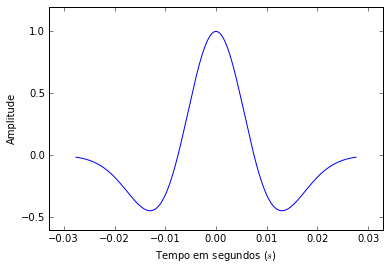

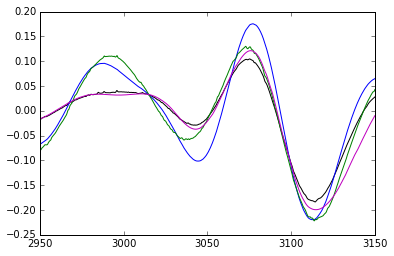

In [21]:
#wavlet

A3 = 1.000000
f3 = 30
ff3 = str(f3) + " - Hz" # transforma em string

wav3 = []
for i in range (len(TT)):
    EE4 = -(np.pi**2)*(f3**2)*(TT[i]**2)
    wav04 = A3*(1 - (2*(np.pi**2)) * (f3**2) * (TT[i]**2))*np.exp(EE4) # 2497.55919007
    wav3.append(wav04)
    
wav3s = []
for i in range (len(TT)):
    EE4s = -(np.pi**2)*(f3**2)*(TTs[i]**2)
    wav04s = A3*(1 - (2*(np.pi**2)) * (f3**2) * (TTs[i]**2))*np.exp(EE4s) # 2497.55919007
    wav3s.append(wav04s)
    
wav3a = []
for i in range (len(TT)):
    EE4a = -(np.pi**2)*(f3**2)*(TTa[i]**2)
    wav04a = A3*(1 - (2*(np.pi**2)) * (f3**2) * (TTa[i]**2))*np.exp(EE4a) # 2497.55919007
    wav3a.append(wav04a)


plt.plot(TT,wav3,'-b')
plt.xlim(xmax=0.033,xmin=-0.033)
plt.xlabel('Tempo em segundos ($s$)')
plt.ylabel('Amplitude')
plt.show()

# Convolucao

signal3  = np.convolve(R ,wav3,'same')  # wavlet convolucao Padrao
signal3s = np.convolve(Rs,wav3s,'same') # wavlet convolucao Siqueira
signal3a = np.convolve(Ra,wav3a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal3,'-k')
plt.plot(prof,signal3s,'-b')
plt.plot(prof,signal3a,'-g')
plt.plot(prof,FXG,'-m')
plt.xlim(xmax=prof[p-1])
plt.show()

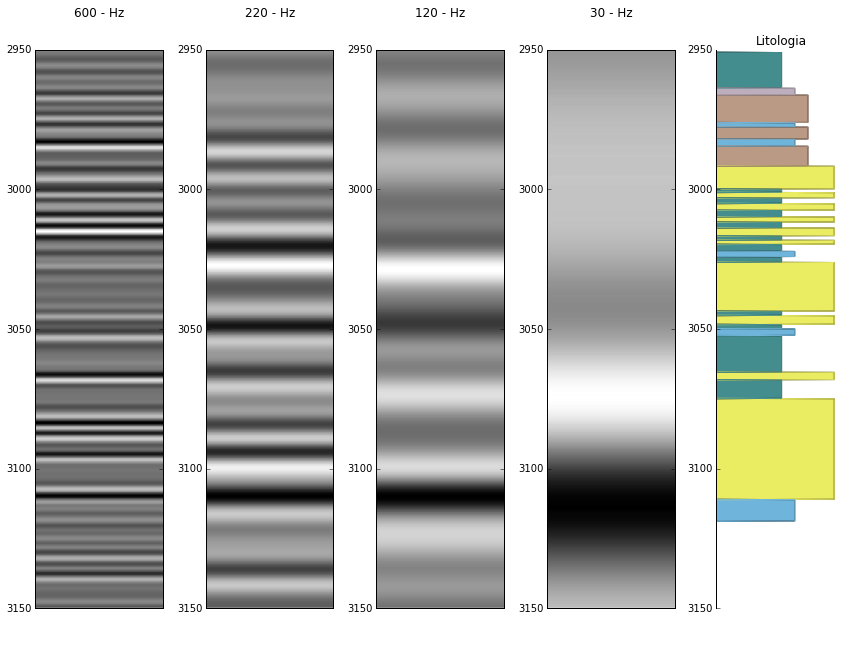

In [22]:
vals = 300

DD = [signal]*vals
DD = np.array(DD)
DD = np.transpose(DD)

DD1 = [signal1]*vals
DD1 = np.array(DD1)
DD1 = np.transpose(DD1)

DD2 = [signal2]*vals
DD2 = np.array(DD2)
DD2 = np.transpose(DD2)

DD3 = [signal3]*vals
DD3 = np.array(DD3)
DD3 = np.transpose(DD3)
#------------------------------------------------------------------------------------------------------------------------#
sism_sint0 = np.linspace(0,p,5)
sism_sint1 = [2950,3000,3050,3100,3150]
#------------------------------------------------------------------------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)
#------------------------------------------------------------------------------------------------------------------------#
ax1.matshow(DD,cmap=cm.gray)
ax1.set_title(ff)
ax1.axes.get_xaxis().set_visible(False)
ax1.set_yticks(sism_sint0)
ax1.set_yticklabels(sism_sint1)
#--------------------------------------------------------------------------------------------------#
ax2.matshow(DD1,cmap=cm.gray)
ax2.set_title(ff1)
ax2.axes.get_xaxis().set_visible(False)
ax2.set_yticks(sism_sint0)
ax2.set_yticklabels(sism_sint1)
#--------------------------------------------------------------------------------------------------#
ax3.matshow(DD2,cmap=cm.gray)
ax3.set_title(ff2)
ax3.axes.get_xaxis().set_visible(False)
ax3.set_yticks(sism_sint0)
ax3.set_yticklabels(sism_sint1)
#--------------------------------------------------------------------------------------------------#
ax4.matshow(DD3,cmap=cm.gray)
ax4.set_title(ff3)
ax4.axes.get_xaxis().set_visible(False)
ax4.set_yticks(sism_sint0)
ax4.set_yticklabels(sism_sint1)
#--------------------------------------------------------------------------------------------------#
ax5.plot(are,prof,'-',linewidth = 1,color='#eaec61')
ax5.plot(sil,prof,'-',linewidth = 1,color='#bb9a85')
ax5.plot(arg,prof,'-',linewidth = 1,color='#438d8e')
ax5.plot(mar,prof,'-',linewidth = 1,color='#6fb5db')
ax5.plot(mao,prof,'-',linewidth = 1,color='#bdaebe')

ax5.fill_betweenx(prof, are, facecolor='#eaec61')
ax5.fill_betweenx(prof, arg, facecolor='#438d8e')
ax5.fill_betweenx(prof, sil, facecolor='#bb9a85')
ax5.fill_betweenx(prof, mar, facecolor='#6fb5db')
ax5.fill_betweenx(prof, mao, facecolor='#bdaebe')

ax5.set_title('Litologia')                       
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.set_xlim(xmax=100,xmin=0)

ax5.invert_yaxis()

ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.set_xlabel('$\,$')

ax5.yaxis.set_ticks_position('left')
ax5.axes.get_xaxis().set_ticks([])

ax5.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#

plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Resultados -</font>

In [23]:
#------------------------diferenca velocidades--------------------------#

difVPVPa = [] # Diferenca absoluta VP - VPa
difVPVPs = [] # Diferenca absoluta VP - VPs

relVPVPa = [] # Diferenca relativa VP - VPa
relVPVPs = [] # Diferenca relativa VP - VPs

for i in range (p):
    difVPVPa.append(np.sqrt((VPa[i] - VP[i])**2))
    difVPVPs.append(np.sqrt((VPs[i] - VP[i])**2))
    
    relVPVPa.append(100.0*np.sqrt((((VP[i] - VPa[i])/VP[i]))**2))
    relVPVPs.append(100.0*np.sqrt((((VP[i] - VPs[i])/VP[i]))**2))

In [24]:
#---------------------------------Medidas-Estatisticas------------------------------------#
medVP = np.mean(VP) # media
maxVP = max    (VP) # maximo
minVP = min    (VP) # minimo
varVP = np.var (VP) # variancia
stdVP = np.std (VP) # desvio padrao
#----------------------------------------------#
print "-----------valores de VP-------------"
print medVP,"m/s   - media "
print maxVP,"m/s   - valor maximo"
print minVP,"m/s   - valor minimo"
print varVP,"m²/s² - variancia"
print stdVP,"m/s   - desvio padrao"
print "-------------------------------------"
#----------------------------------------------#
medVPa = np.mean(VPa) # media
maxVPa = max    (VPa) # maximo
minVPa = min    (VPa) # minimo
varVPa = np.var (VPa) # variancia
stdVPa = np.std (VPa) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPa------------"
print medVPa,"m/s   - media "
print maxVPa,"m/s   - valor maximo"
print minVPa,"m/s   - valor minimo"
print varVPa,"m²/s² - variancia"
print stdVPa,"m/s   - desvio padrao"
print "-------------------------------------"
#----------------------------------------------#
medVPs = np.mean(VPs) # media
maxVPs = max    (VPs) # maximo
minVPs = min    (VPs) # minimo
varVPs = np.var (VPs) # variancia
stdVPs = np.std (VPs) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPs------------"
print medVPs,"m/s   - media "
print maxVPs,"m/s   - valor maximo"
print minVPs,"m/s   - valor minimo"
print varVPs,"m²/s² - variancia"
print stdVPs,"m/s   - desvio padrao"
print "-------------------------------------"
print
print "------------Erro Absoluto------------"
medeaVPVPa = np.mean(difVPVPa) # media
maxeaVPVPa = max    (difVPVPa) # maximo
mineaVPVPa = min    (difVPVPa) # minimo
vareaVPVPa = np.var (difVPVPa) # variancia
stdeaVPVPa = np.std (difVPVPa) # desvio padrao
#----------------------------------------------#
print "---------valores de eaVPVPa----------"
print medeaVPVPa,"m/s   - media "
print maxeaVPVPa,"m/s   - valor maximo"
print mineaVPVPa,"m/s   - valor minimo"
print vareaVPVPa,"m²/s² - variancia"
print stdeaVPVPa,"m/s   - desvio padrao"
print "-------------------------------------"
medeaVPVPs = np.mean(difVPVPs) # media
maxeaVPVPs = max    (difVPVPs) # maximo
mineaVPVPs = min    (difVPVPs) # minimo
vareaVPVPs = np.var (difVPVPs) # variancia
stdeaVPVPs = np.std (difVPVPs) # desvio padrao
#----------------------------------------------#
print "---------valores de eaVPVPs----------"
print medeaVPVPs,"m/s   - media "
print maxeaVPVPs,"m/s   - valor maximo"
print mineaVPVPs,"m/s   - valor minimo"
print vareaVPVPs,"m²/s² - variancia"
print stdeaVPVPs,"m/s   - desvio padrao"
print "-------------------------------------"
print
print "------------Erro relativo------------"
mederVPVPa = np.mean(relVPVPa) # media
maxerVPVPa = max    (relVPVPa) # maximo
minerVPVPa = min    (relVPVPa) # minimo
varerVPVPa = np.var (relVPVPa) # variancia
stderVPVPa = np.std (relVPVPa) # desvio padrao
#----------------------------------------------#
print "---------valores de erVPVPa----------"
print mederVPVPa,"m/s   - media "
print maxerVPVPa,"m/s   - valor maximo"
print minerVPVPa,"m/s   - valor minimo"
print varerVPVPa,"m²/s² - variancia"
print stderVPVPa,"m/s   - desvio padrao"
print "-------------------------------------"
mederVPVPs = np.mean(relVPVPs) # media
maxerVPVPs = max    (relVPVPs) # maximo
minerVPVPs = min    (relVPVPs) # minimo
varerVPVPs = np.var (relVPVPs) # variancia
stderVPVPs = np.std (relVPVPs) # desvio padrao
#----------------------------------------------#
print "---------valores de erVPVPs----------"
print mederVPVPs,"m/s   - media "
print maxerVPVPs,"m/s   - valor maximo"
print minerVPVPs,"m/s   - valor minimo"
print varerVPVPs,"m²/s² - variancia"
print stderVPVPs,"m/s   - desvio padrao"
print "-------------------------------------"


print'\\begin{table}[]'
print'\centering'
print'\caption{Medidas Estatísticas do Poço NA-'+name+'}'
print'\label{estna'+name+'}'
print'\\begin{tabular}{|l|l|l|l|l|l|}'
print'\hline'
print'& média & valor máximo & valor mínimo & variância & desvio padrão \\\ \hline'
print'Valores de $V_P$ & '+str(round(medVP,2))+' & '+str(round(maxVP,2))+' & '+str(round(minVP,2))+' & '+str(round(varVP,2))+' & '+str(round(stdVP,2))+' \\\ \hline'
print'Valores de $V_{P,A}$ & '+str(round(medVPa,2))+' & '+str(round(maxVPa,2))+' & '+str(round(minVPa,2))+' & '+str(round(varVPa,2))+' & '+str(round(stdVPa,2))+' \\\ \hline'
print'Valores de $V_{P,S}$ & '+str(round(medVPs,2))+' & '+str(round(maxVPs,2))+' & '+str(round(minVPs,2))+' & '+str(round(varVPs,2))+' & '+str(round(stdVPs,2))+' \\\ \hline'
print'Erro Absoluto $|V_P - V_{P,A}|$ & '+str(round(medeaVPVPa,2))+' & '+str(round(maxeaVPVPa,2))+' & '+str(round(mineaVPVPa,2))+' & '+str(round(vareaVPVPa,2))+' & '+str(round(stdeaVPVPa,2))+' \\\ \hline'
print'Erro Absoluto $|V_P - V_{P,S}|$ & '+str(round(medeaVPVPs,2))+' & '+str(round(maxeaVPVPs,2))+' & '+str(round(mineaVPVPs,2))+' & '+str(round(vareaVPVPs,2))+' & '+str(round(stdeaVPVPs,2))+' \\\ \hline'
print'Erro Relativo $\\frac{|V_P - V_{P,A}|}{V_P}$ & '+str(round(mederVPVPa,2))+' & '+str(round(maxerVPVPa,2))+' & '+str(round(minerVPVPa,2))+' & '+str(round(varerVPVPa,2))+' & '+str(round(stderVPVPa,2))+' \\\ \hline'
print'Erro Relativo $\\frac{|V_P - V_{P,S}|}{V_P}$ & '+str(round(mederVPVPs,2))+' & '+str(round(maxerVPVPs,2))+' & '+str(round(minerVPVPs,2))+' & '+str(round(varerVPVPs,2))+' & '+str(round(stderVPVPs,2))+' \\\ \hline'
print'\end{tabular}'
print'\end{table}'

-----------valores de VP-------------
3683.43473687 m/s   - media 
5730.46474694 m/s   - valor maximo
2927.97205639 m/s   - valor minimo
250258.491479 m²/s² - variancia
500.258424695 m/s   - desvio padrao
-------------------------------------
-----------valores de VPa------------
3911.49443616 m/s   - media 
5543.67292478 m/s   - valor maximo
3155.27874754 m/s   - valor minimo
339287.808199 m²/s² - variancia
582.484169913 m/s   - desvio padrao
-------------------------------------
-----------valores de VPs------------
3368.682815 m/s   - media 
4500.11674255 m/s   - valor maximo
2440.79954447 m/s   - valor minimo
192457.43146 m²/s² - variancia
438.699705333 m/s   - desvio padrao
-------------------------------------

------------Erro Absoluto------------
---------valores de eaVPVPa----------
315.576032859 m/s   - media 
1311.69299687 m/s   - valor maximo
0.810697301675 m/s   - valor minimo
58565.258637 m²/s² - variancia
242.002600476 m/s   - desvio padrao
------------------------------

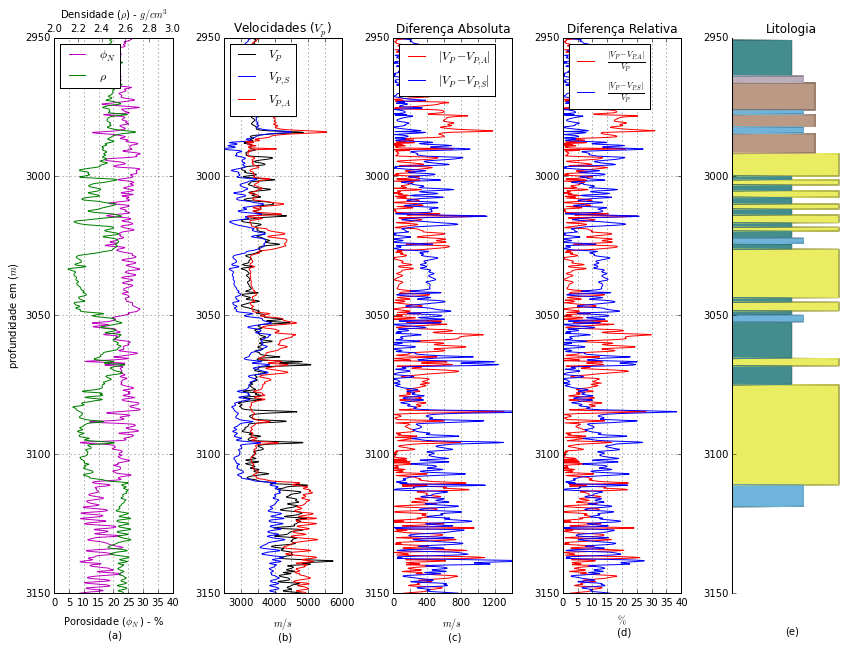

In [25]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)

#--------------------------------------------------------------------------------------------------#
lab1 = ax1.plot(PHIN,prof,'-m',linewidth = 1,label='$\phi_N$')
#lab2 = ax1.plot(PHItd,prof,'-m',linewidth = 1,label='$\phi_{t,D}$')


ax1.set_xlabel('Porosidade ($\phi_N$) - % \n (a)')                    
ax1.set_ylabel('profundidade em ($m$)')

ax0 = ax1.twiny()

lab0 = ax0.plot(RHOb,prof,'-g',linewidth = 1,label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')

labf = lab1+lab0#+lab2

labs = [l.get_label() for l in labf]
plt.legend(labf, labs, loc=2)

ax1.set_ylim(ymax=max(prof),ymin=min(prof))

ax0.set_xlim(xmax=3.0,xmin=2.0)
ax1.set_xlim(xmax=40.0,xmin=0.0)

ax1.invert_yaxis()
ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.plot(VP ,prof,'-k',linewidth = 1,label='$V_P$')
ax2.plot(VPs,prof,'-b',linewidth = 1,label='$V_{P,S}$')
ax2.plot(VPa,prof,'-r',linewidth = 1,label='$V_{P,A}$')


ax2.set_title('Velocidades ($V_p$)')                      
ax2.set_xlabel('$m/s$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.set_xlim(xmax=6000,xmin=2500)
ax2.invert_yaxis()
ax2.grid()

ax2.legend(loc=2)

ax2.set_xticklabels([" ",3000," ",4000," ",5000," ",6000])

#--------------------------------------------------------------------------------------------------#
ax3.plot(difVPVPa,prof,'-r',linewidth = 1,label='$|V_P - V_{P,A}|$') # augusto
ax3.plot(difVPVPs,prof,'-b',linewidth = 1,label='$|V_P - V_{P,S}|$') # siqueira
ax3.set_title(u'Diferença Absoluta')

ax3.set_xlabel('$m/s$ \n (c)')
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=1400,xmin=0)
ax3.invert_yaxis()
ax3.grid()

ax3.set_xticklabels([0,   " ",   400,   " ",   800,  " ",  1200,  " "])

ax3.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax4.plot(relVPVPa,prof,'-r',linewidth = 1,label='$\\frac{|V_P - V_{P,A}|}{V_P}$') # augusto
ax4.plot(relVPVPs,prof,'-b',linewidth = 1,label='$\\frac{|V_P - V_{P,S}|}{V_P}$') # siqueira
ax4.set_title(u'Diferença Relativa')

ax4.set_xlabel('$\%$ \n (d)')
ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=40,xmin=0)
ax4.invert_yaxis()
ax4.grid()

ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax5.plot(are,prof,'-',linewidth = 1,color='#eaec61')
ax5.plot(sil,prof,'-',linewidth = 1,color='#bb9a85')
ax5.plot(arg,prof,'-',linewidth = 1,color='#438d8e')
ax5.plot(mar,prof,'-',linewidth = 1,color='#6fb5db')
ax5.plot(mao,prof,'-',linewidth = 1,color='#bdaebe')

ax5.fill_betweenx(prof, are, facecolor='#eaec61')
ax5.fill_betweenx(prof, arg, facecolor='#438d8e')
ax5.fill_betweenx(prof, sil, facecolor='#bb9a85')
ax5.fill_betweenx(prof, mar, facecolor='#6fb5db')
ax5.fill_betweenx(prof, mao, facecolor='#bdaebe')

ax5.set_title('Litologia')                       
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.set_xlim(xmax=100,xmin=0)

ax5.invert_yaxis()

ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_visible(False)

ax5.yaxis.set_ticks_position('left')
ax5.axes.get_xaxis().set_ticks([])

ax5.set_xlabel('(e)')
ax5.xaxis.set_label_coords(0.5, -0.06)

#--------------------------------------------------------------------------------------------------#

plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

#--------------------------------------------------------------------------------------------------#

name2 = '../../mario_tese/Figs/pocos/na'+name+'perfil1.png'

fig.savefig(name2, dpi=100, transparent=True, bbox_inches='tight')

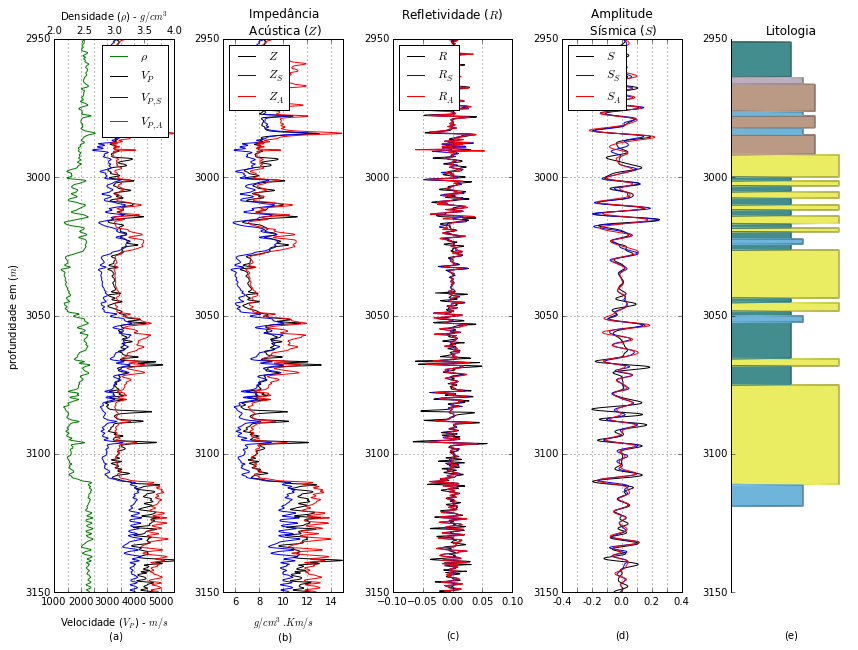

In [26]:
#--------------------------------------------------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

#fig.suptitle('', fontsize=12)
fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
lab1 = ax1.plot(PHIN,prof,'-k',linewidth = 1,label='$\phi_N$')


lab1 = ax1.plot(VP ,prof,'-k',linewidth = 1,label='$V_P$')
lab2 = ax1.plot(VPs,prof,'-b',linewidth = 1,label='$V_{P,S}$')
lab3 = ax1.plot(VPa,prof,'-r',linewidth = 1,label='$V_{P,A}$')                    
ax1.set_ylabel('profundidade em ($m$)')

ax0 = ax1.twiny()

lab0 = ax0.plot(RHOb,prof,'-g',linewidth = 1,label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')
ax1.set_xlabel('Velocidade ($V_P$) - $m/s$ \n (a)')

labf = lab0+lab1+lab2+lab3

labs = [l.get_label() for l in labf]
plt.legend(labf, labs, loc=0)

ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.set_xlim(xmax=5500,xmin=1000)
ax0.set_xlim(xmax=4,xmin=2)

ax1.invert_yaxis()
ax1.grid()

ax1.set_xticklabels([1000," ",2000," ",3000," ",4000," ",5000," "])
#--------------------------------------------------------------------------------------------------#

ax2.plot(z_imp  ,prof,'-k',linewidth = 1,label='$Z$')
ax2.plot(z_imp_s,prof,'-b',linewidth = 1,label='$Z_{S}$')
ax2.plot(z_imp_a,prof,'-r',linewidth = 1,label='$Z_{A}$')         

ax2.set_title(u'Impedância \n Acústica ($Z$)')                      
ax2.set_xlabel('$g/cm^3 . Km/s$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.set_xlim(xmax=15,xmin=5)
ax2.invert_yaxis()
ax2.grid()

ax2.legend(loc=2)

#--------------------------------------------------------------------------------------------------#
ax3.plot(R ,prof,'-k',linewidth = 1,label='$R$') 
ax3.plot(Rs,prof,'-b',linewidth = 1,label='$R_{S}$') 
ax3.plot(Ra,prof,'-r',linewidth = 1,label='$R_{A}$') 
ax3.set_title('Refletividade ($R$) \n')
ax3.set_xlabel('(c)')
ax3.xaxis.set_label_coords(0.5, -0.07)

#ax3.set_xlabel('$m/s$')
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.1,xmin=-0.1)
ax3.invert_yaxis()
ax3.grid()

ax3.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax4.plot(signal ,prof,'-k',linewidth = 1,label='$S$') 
ax4.plot(signals,prof,'-b',linewidth = 1,label='$S_S$')
ax4.plot(signala,prof,'-r',linewidth = 1,label='$S_A$')

ax4.set_title(u'Amplitude \n Sísmica ($S$)')
ax4.set_xlabel('(d)')
ax4.xaxis.set_label_coords(0.5, -0.07)

#ax4.fill_betweenx(prof, signal,  where=signal >0.0, facecolor='black', alpha=0.1, label="$\phi_e,S$")
#ax4.fill_betweenx(prof, signals, where=signals>0.0, facecolor='blue' , alpha=0.1, label="$\phi_e,S$")
#ax4.fill_betweenx(prof, signala, where=signala>0.0, facecolor='green', alpha=0.1, label="$\phi_e,S$")

ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=0.4,xmin=-0.4)
ax4.invert_yaxis()
ax4.grid()

ax4.set_xticklabels([-0.4," ",-0.2," ",0.0," ",0.2," ",0.4])

ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax5.plot(are,prof,'-',linewidth = 1,color='#eaec61')
ax5.plot(sil,prof,'-',linewidth = 1,color='#bb9a85')
ax5.plot(arg,prof,'-',linewidth = 1,color='#438d8e')
ax5.plot(mar,prof,'-',linewidth = 1,color='#6fb5db')
ax5.plot(mao,prof,'-',linewidth = 1,color='#bdaebe')

ax5.fill_betweenx(prof, are, facecolor='#eaec61')
ax5.fill_betweenx(prof, arg, facecolor='#438d8e')
ax5.fill_betweenx(prof, sil, facecolor='#bb9a85')
ax5.fill_betweenx(prof, mar, facecolor='#6fb5db')
ax5.fill_betweenx(prof, mao, facecolor='#bdaebe')

ax5.set_title('Litologia')                       
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.set_xlim(xmax=100,xmin=0)

ax5.invert_yaxis()

ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_visible(False)

ax5.yaxis.set_ticks_position('left')
ax5.axes.get_xaxis().set_ticks([])

lab_a = mpatches.Patch(label='Folhelho'    ,color='#438d8e')
lab_b = mpatches.Patch(label='Siltito'     ,color='#bb9a85')
lab_c = mpatches.Patch(label='Arenito'     ,color='#eaec61')
lab_d = mpatches.Patch(label='Marga'       ,color='#bdaebe')
lab_e = mpatches.Patch(label='Calcilutito' ,color='#6fb5db')

#ax5.legend(handles=[lab_a,lab_b,lab_c,lab_d,lab_e], loc=2, frameon=False)

ax5.set_xlabel('(e)')
ax5.xaxis.set_label_coords(0.5, -0.07)
#-------------------#

plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

name2 = '../../mario_tese/Figs/pocos/na'+name+'perfil2.png'
transparent=True
fig.savefig(name2, dpi=100, transparent=True, bbox_inches='tight')

<br><center><font face="Times New ROman" size="6" color="#000000">- Banco de Dados - Exportando Valores -</font>

In [27]:
X = [355422]*p
Y = [7515514]*p

#-----------Nota: caso o sonico nao exista, os valores de augusto e siqueira sao os originais.
#-----------Caso contrario, sao os modelos testados

filef = np.array([[-999.000]*14]*p)
filef[:,0] = X
filef[:,1] = Y
filef[:,2] = prof   # profundidade
filef[:,3] = DTP    # sonico 
filef[:,4] = GR     # gama ray
filef[:,5] = ILD    # resistividade
filef[:,6] = PHIN   # porosidade neutronica
filef[:,7] = RHOb   # densidade

#----------------Siqueira----------------------#

filef[:,8] = z_imp  # Impedancia acustica
filef[:,9] = R      # Refletividade
filef[:,10] = signal # Sismograma sintetico

#----------------Augusto-----------------------#

filef[:,11]= z_imp  # Impedancia acustica
filef[:,12]= R      # Refletividade
filef[:,13]= signal # Sismograma sintetico

np.savetxt('na04_mario.dat', filef, delimiter=' ', fmt='%.4f')

TERRORISMO NO BRASIL -- Como vocês devem saber, no dia 13 de abril deste ano a ABIN (Agência Brasileira de Inteligência) confirmou a suspeita de ameaças do Estado Islâmico (EI) contra o Brasil. Porém, no dia 20 (ontem) alguns brasileiros descobriram (não se sabe como) o número de celular de um suposto terrorista do EI, e responderam as ameças do grupo terrorista com mensagens contendo Jesus Cristo, Carreta Furacão, Capitão Nascimento de demais zueiras relacionadas. Deixando claro o nosso posicionamento em relação ao grupo terrorista. Notícia original ()http://extra.globo.com/incoming/19131876-9ad-c5c/w448/terror-03.jpg